In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
food=pd.read_csv('food-truck.csv')

In [3]:
food.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


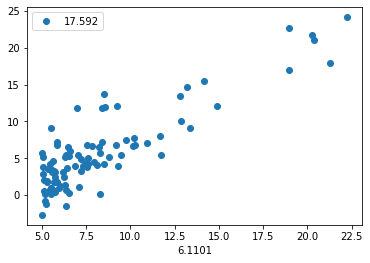

In [4]:
food.plot(x="6.1101",y="17.592",style="o")
plt.show()

In [5]:
x_mean=food["6.1101"].mean()
y_mean=food["17.592"].mean()
print(x_mean,y_mean)

8.18115104166667 5.716709374999997


In [6]:
food["x"]=food["6.1101"]-x_mean
food["y"]=food["17.592"]-y_mean
food["x*y"]=food["x"]*food["y"]
food["x^2"]=food["x"]**2
food["y^2"]=food["y"]**2
food

,6.1101,17.592,x,y,x*y,x^2,y^2
0,5.5277,9.13020,-2.653451,3.413491,-9.057530,7.040802,11.651918
1,8.5186,13.66200,0.337449,7.945291,2.681130,0.113872,63.127643
2,7.0032,11.85400,-1.177951,6.137291,-7.229428,1.387569,37.666336
3,5.8598,6.82330,-2.321351,1.106591,-2.568785,5.388671,1.224543
4,8.3829,11.88600,0.201749,6.169291,1.244648,0.040703,38.060147
...,...,...,...,...,...,...,...
91,5.8707,7.20290,-2.310451,1.486191,-3.433771,5.338184,2.208763
92,5.3054,1.98690,-2.875751,-3.729809,10.726003,8.269944,13.911478
93,8.2934,0.14454,0.112249,-5.572169,-0.625470,0.012600,31.049072
94,13.3940,9.05510,5.212849,3.338391,17.402526,27.173794,11.144852


In [7]:
summation_x_y=food["x*y"].sum()
summation_x_squared=food["x^2"].sum()
summation_y_squared=food["y^2"].sum()
print(summation_x_y,summation_x_squared,summation_y_squared)

1739.5603117330627 1433.450824539896 2775.2783647179626


In [8]:
correlation=summation_x_y/(summation_x_squared*summation_y_squared)**0.5
correlation

0.8721572919685903

In [9]:
def getMean(numbers):
    if len(numbers)==0:
        return None
    else:
        current_sum=0
        for i in numbers:
            current_sum+=i
            current_avg=current_sum/len(numbers)
        return current_avg    


In [10]:
def getSD(numbers):
    if len(numbers)==0:
        return 0
    else:
        mean=getMean(numbers)
        std_deviation=0
        for i in numbers:
            std_deviation+=(i-mean)**2
        return(std_deviation/len(numbers))**0.5   

In [11]:
std_deviation_x=getSD(food["x"].tolist())
std_deviation_y=getSD(food["y"].tolist())
print(std_deviation_x,std_deviation_y)

3.8641660707441887 5.37672294548257


In [12]:
m=correlation*(std_deviation_y/std_deviation_x)
m

1.2135472539083578

In [13]:
c=food["6.1101"].mean()-m*food["17.592"].mean()
c

1.2436540782432592

In [14]:
food["y_prediction"]=m*food["17.592"]+c
food

,6.1101,17.592,x,y,x*y,x^2,y^2,y_prediction
0,5.5277,9.13020,-2.653451,3.413491,-9.057530,7.040802,11.651918,12.323583
1,8.5186,13.66200,0.337449,7.945291,2.681130,0.113872,63.127643,17.823137
2,7.0032,11.85400,-1.177951,6.137291,-7.229428,1.387569,37.666336,15.629043
3,5.8598,6.82330,-2.321351,1.106591,-2.568785,5.388671,1.224543,9.524051
4,8.3829,11.88600,0.201749,6.169291,1.244648,0.040703,38.060147,15.667877
...,...,...,...,...,...,...,...,...
91,5.8707,7.20290,-2.310451,1.486191,-3.433771,5.338184,2.208763,9.984714
92,5.3054,1.98690,-2.875751,-3.729809,10.726003,8.269944,13.911478,3.654851
93,8.2934,0.14454,0.112249,-5.572169,-0.625470,0.012600,31.049072,1.419060
94,13.3940,9.05510,5.212849,3.338391,17.402526,27.173794,11.144852,12.232446


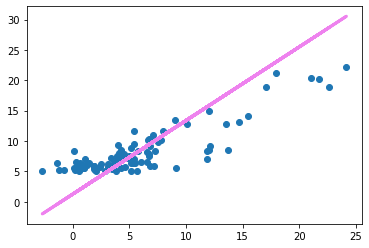

In [15]:
plot1=plt.scatter(food["17.592"],food["6.1101"])
plot2=plt.plot(food["17.592"],food["y_prediction"],color="violet",linewidth='3')
plt.show()